## UnSupervised Learning- CLUSTERING

### Clustering
    Process of dividing datasets into groups, consisting o similar points. 
    A group of objects that are similar to other objects in the cluster, and dissimilar to data points in other cluster.

### K Means Clustering:
	K Means is a partitioned based clustering. 

#### Lets Start Now... 
Import all the libraries required.


In [105]:
import pandas as pd
import datetime as dt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
%matplotlib inline

Import the Data Set from the datapath

In [106]:
df=pd.read_excel("C:\\Users\\vragha2x\\Desktop\\Other Docs\\PDS\\Python\\Online Retail.xlsx")

In [107]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [108]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [109]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Cross verify how many records have Negative price.

In [110]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [111]:
df=df[ ~df.CustomerID.isna()]

In [112]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [113]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


Creating a new column called as 'total_price' by multiplying Quantity and UnitPrice

In [114]:
df["total_price"]=df.Quantity*df.UnitPrice

In [115]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [116]:
df.CustomerID.describe()

count    406829.000000
mean      15287.690570
std        1713.600303
min       12346.000000
25%       13953.000000
50%       15152.000000
75%       16791.000000
max       18287.000000
Name: CustomerID, dtype: float64

In [117]:
df.total_price.describe()

count    406829.000000
mean         20.401854
std         427.591718
min     -168469.600000
25%           4.200000
50%          11.100000
75%          19.500000
max      168469.600000
Name: total_price, dtype: float64

In [119]:
#Top Customers
df.groupby('CustomerID').agg({'total_price':lambda x:sum(x)}).sort_values(ascending=False,by='total_price')

,total_price
CustomerID,
14646.0,279489.02
18102.0,256438.49
17450.0,187482.17
14911.0,132572.62
12415.0,123725.45
14156.0,113384.14
17511.0,88125.38
16684.0,65892.08
13694.0,62653.10


In [120]:
df[df.CustomerID==17448.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom,-4287.63


In [121]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'total_price'],
      dtype='object')

In [122]:
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [123]:
df.Description.unique()

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [138]:
#Unique Customers
df.groupby('CustomerID').agg({'InvoiceNo':lambda x:pd.Series.nunique(x)}).sort_values(ascending=False,by='InvoiceNo')

,InvoiceNo
CustomerID,
14911.0,248
12748.0,224
17841.0,169
14606.0,128
13089.0,118
15311.0,118
12971.0,89
14527.0,86
13408.0,81


In [125]:
df[df.CustomerID.isin(df[df.Quantity<0].CustomerID)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08


In [126]:
df.InvoiceDate.max()

Timestamp('2011-12-09 12:50:00')

In [127]:
df.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

In [128]:
(dt.datetime.now()-df.InvoiceDate.min()).days

3163

In [129]:
df.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
total_price           float64
dtype: object

In [130]:
current_time=df.InvoiceDate.max()

In [131]:
grp=df.groupby('CustomerID').agg({'InvoiceNo': lambda x:pd.Series.nunique(x),\
                                 'total_price':lambda x: sum(x),
                                 'InvoiceDate':lambda x:(current_time-max(x)).days})

#### RFM Analysis

#Recency - the Recency value for a retailer is the time
interval between a global datum and his/her latest
transaction.

#Frequency - the total number of transactions put through
all of the EFTPOS terminals belonging to a retailer forms
the Frequency value of the retailer.

#Monetary value - the total amount of transactions put
through all of the EFTPOS terminals belonging a retailer
forms the Monetary value of the retailer.

In [132]:
grp=grp.rename(columns={"InvoiceNo":"Frequency",
           "total_price":"Monetry",
           "InvoiceDate":"Recency"})

In [44]:
grp

,Frequency,Monetry,Recency
CustomerID,,,
12346.0,2,0.000000e+00,325
12347.0,7,4.310000e+03,1
12348.0,4,1.797240e+03,74
12349.0,1,1.757550e+03,18
12350.0,1,3.344000e+02,309
12352.0,11,1.545410e+03,35
12353.0,1,8.900000e+01,203
12354.0,1,1.079400e+03,231
12355.0,1,4.594000e+02,213


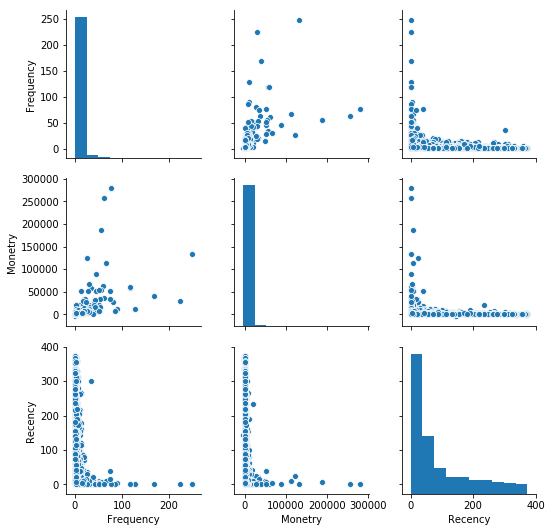

In [133]:
sns.pairplot(grp)

Convert the RFM values to scores

In [135]:
def score(x,series,recency=False):
    if recency==False:
        if x<=series.quantile(0.25):
            return 1
        elif x<=series.quantile(0.5):
            return 2
        elif x<=series.quantile(0.75):
            return 3
        else:
            return 4
    else:
        if x<=series.quantile(0.25):
            return 4
        elif x<=series.quantile(0.5):
            return 3
        elif x<=series.quantile(0.75):
            return 2
        else:
            return 1
        
grp['R_Score']=grp.Recency.map(lambda x: score(x,grp.Recency,True))
grp['F_Score']=grp.Frequency.map(lambda x: score(x,grp.Frequency))
grp['M_Score']=grp.Monetry.map(lambda x: score(x,grp.Monetry))        

In [136]:
grp

,Frequency,Monetry,Recency,R_Score,F_Score,M_Score
CustomerID,,,,,,
12346.0,2,0.000000e+00,325,1,2,1
12347.0,7,4.310000e+03,1,4,4,4
12348.0,4,1.797240e+03,74,2,3,4
12349.0,1,1.757550e+03,18,3,1,4
12350.0,1,3.344000e+02,309,1,1,2
12352.0,11,1.545410e+03,35,3,4,3
12353.0,1,8.900000e+01,203,1,1,1
12354.0,1,1.079400e+03,231,1,1,3
12355.0,1,4.594000e+02,213,1,1,2


In [137]:
cluster=KMeans(n_clusters=7,random_state=25,max_iter=1000)
cluster.fit(grp[['F_Score',"M_Score","R_Score"]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=1000,
    n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=25, tol=0.0001, verbose=0)

In [49]:
labels=cluster.predict(grp[['F_Score', 'R_Score', 'M_Score']])
grp['labels']=labels

In [50]:
grp

,Frequency,Monetry,Recency,R_Score,F_Score,M_Score,labels
CustomerID,,,,,,,
12346.0,2,0.000000e+00,325,1,2,1,5
12347.0,7,4.310000e+03,1,5,4,5,3
12348.0,4,1.797240e+03,74,2,3,4,2
12349.0,1,1.757550e+03,18,4,1,4,2
12350.0,1,3.344000e+02,309,1,1,2,5
12352.0,11,1.545410e+03,35,3,5,4,3
12353.0,1,8.900000e+01,203,1,1,1,5
12354.0,1,1.079400e+03,231,1,1,4,6
12355.0,1,4.594000e+02,213,1,1,2,5


#### Calculate the Silhoutte Coefficient

The Silhouette Coefficient is calculated using the mean intra-cluster
distance (``a``) and the mean nearest-cluster distance (``b``) for each
sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,b)``.  
To clarify, ``b`` is the distance between a sample and the nearest
cluster that the sample is not a part of.
Note that Silhouette Coefficient is only defined if number of labels
is 2 <= n_labels <= n_samples - 1.

This function returns the mean Silhouette Coefficient over all samples.

The best value is 1 and the worst value is -1. Values near 0 indicate
overlapping clusters. Negative values generally indicate that a sample has
been assigned to the wrong cluster, as a different cluster is more similar.

In [52]:
score=silhouette_score(grp[['F_Score',"M_Score","R_Score"]],labels)
print('Silhoutte Score:',score)

Silhoutte Score: 0.36519012381680727


In [53]:
grp.columns

Index(['Frequency', 'Monetry', 'Recency', 'R_Score', 'F_Score', 'M_Score',
       'labels'],
      dtype='object')

In [54]:
cluster.cluster_centers_

array([[3.71459227, 4.31545064, 2.39699571],
       [1.57300885, 3.33849558, 2.        ],
       [2.87148594, 3.2248996 , 4.42168675],
       [4.6218656 , 4.69408225, 4.48645938],
       [3.25065274, 2.53785901, 2.15665796],
       [1.26045016, 1.42336549, 1.33654877],
       [1.37013997, 1.57076205, 3.72161742]])

In [55]:
for k in range(2,20):
    cluster=KMeans(n_clusters=k,random_state=23,max_iter=1000,n_jobs=-1)
    cluster.fit(grp[['F_Score',"M_Score","R_Score"]])
    labels=cluster.predict(grp[['F_Score', 'R_Score', 'M_Score']])
    score=silhouette_score(grp[['F_Score',"M_Score","R_Score"]],labels)
    print('No of Clusters-K:',k,'/','Score:',score)
    

No of Clusters-K: 2 / Score: 0.4496944258801839
No of Clusters-K: 3 / Score: 0.3412500007286401
No of Clusters-K: 4 / Score: 0.3643301131491864
No of Clusters-K: 5 / Score: 0.33845794386445344
No of Clusters-K: 6 / Score: 0.313924177239988
No of Clusters-K: 7 / Score: 0.3530166255669267
No of Clusters-K: 8 / Score: 0.33217758559596594
No of Clusters-K: 9 / Score: 0.3116216521462202
No of Clusters-K: 10 / Score: 0.31818026708506925
No of Clusters-K: 11 / Score: 0.323599928441163
No of Clusters-K: 12 / Score: 0.3454501463549618
No of Clusters-K: 13 / Score: 0.34691770192606375
No of Clusters-K: 14 / Score: 0.3402558081245354
No of Clusters-K: 15 / Score: 0.34361409211679417
No of Clusters-K: 16 / Score: 0.35578487359913596
No of Clusters-K: 17 / Score: 0.35909135594318503
No of Clusters-K: 18 / Score: 0.3449839995602653
No of Clusters-K: 19 / Score: 0.4009414497379787


In [56]:
cluster.cluster_centers_

array([[2.21276596, 1.60638298, 1.36879433],
       [2.80112045, 2.82913165, 4.11204482],
       [4.69565217, 5.        , 3.66459627],
       [1.75403226, 2.19758065, 3.        ],
       [3.71308017, 4.35864979, 1.81434599],
       [1.        , 2.23394495, 1.        ],
       [1.59428571, 2.        , 4.4       ],
       [3.34158416, 2.68316832, 1.81683168],
       [2.81770833, 4.21354167, 4.46875   ],
       [4.86261261, 4.87162162, 5.        ],
       [1.        , 1.41891892, 2.        ],
       [1.30718954, 1.        , 4.30065359],
       [1.        , 3.26027397, 3.34246575],
       [2.73451327, 4.2300885 , 2.96460177],
       [4.24252492, 3.79069767, 3.59800664],
       [1.        , 1.        , 1.        ],
       [4.01769912, 3.78761062, 5.        ],
       [1.21678322, 1.        , 3.        ],
       [1.65037594, 3.40977444, 1.69924812]])

Calculate the Elbow Point

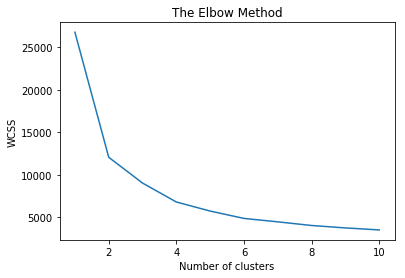

In [61]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(grp[['F_Score',"M_Score","R_Score"]])
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Discussion on RFM Scores

R, F and M have scores from 1-4, there are a total of 4x4x4 = 64 combinations of RFM value. Three dimensions of R, F and M can be best plotted on a 3D chart. 

If we were to look at how many customers do we have for each RFM value, we’d have to look at 64 points of data.

But working with 3D charts on paper or a computer screen is not going to work. We need something in two dimensions, something easier to depict and understand.

### Simpler representation of RFM analysis
we can plot frequency + monetary score on Y-axis (range of 1 to 4) and recency (range of 1 to 4) on X-axis.

This reduces possible combinations from 64 to 16. Combining F and M into one makes sense because both are related to how much the customer is buying. R on the other axis gives us quick peek into re-engagement levels with customer.

The customer is equally important in both cases. And our approach of combining frequency and monetary scores gives them equal importance in our RFM analysis.

### Making it more effective – creating segments

Select groups of customers, based on the RFM segments in which they appear.

It is helpful to assign names to segments of interest. Here are just a group types to which the customers can be segmented:

#### Best Customers – This group consists of those customers who are found in R-Tier-4, F-Tier-4 and M-Tier-4, meaning that they transacted recently, do so often and spend more than other customers. A shortened notation for this segment is 4-4-4; we’ll use this notation going forward.

#### High-spending New Customers – This group consists of those customers in 4-1-4 and 4-1-3. These are customers who transacted only once, but very recently and they spent a lot.

#### Lowest-Spending Active Loyal Customers – This group consists of those customers in segments 4-4-1 and 4-4-2 (they transacted recently and do so often, but spend the least).

#### Churned Best Customers – This segment consists of those customers in groups 1-4-4, 1-4-3, 1-3-4 and 1-3-3 (they transacted frequently and spent a lot, but it’s been a long time since they’ve transacted).
Marketers should assemble groups of customers most relevant for their particular business objectives and retention goals.


### Business Overview

Best Customers: Communications with this group should make them feel valued and appreciated. These customers likely generate a disproportionately high percentage of overall revenues and thus focusing on keeping them happy should be a top priority. Further analyzing their individual preferences and affinities will provide additional opportunities for even more personalized messaging.


High-spending New Customers – It is always a good idea to carefully “incubate” all new customers, but because these new customers spent a lot on their first purchase, it’s even more important. Like with the Best Customers group, it’s important to make them feel valued and appreciated – and to give them terrific incentives to continue interacting with the brand.


Lowest-Spending Active Loyal Customers – These repeat customers are active and loyal, but they are low spenders. Marketers should create campaigns for this group that make them feel valued, and incentivize them to increase their spend levels. As loyal customers, it often also pays to reward them with special offers if they spread the word about the brand to their friends, e.g., via social networks.


Churned Best Customers – These are valuable customers who stopped transacting a long time ago. While it’s often challenging to re-engage churned customers, the high value of these customers makes it worthwhile trying. Like with the Best Customers group, it’s important to communicate with them on the basis of their specific preferences, as known from earlier transaction data.
Of course, deciding which groups of customers to target and how to best communicate with them is where the art of marketing comes in!